<a href="https://colab.research.google.com/github/FaridRash/eurusd-regression-forecasting/blob/main/Farid/Farid_1st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Githhub

In [1]:
!git clone https://github.com/FaridRash/eurusd-regression-forecasting

Cloning into 'eurusd-regression-forecasting'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 70 (delta 27), reused 12 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (70/70), 5.12 MiB | 4.28 MiB/s, done.
Resolving deltas: 100% (27/27), done.


#Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Dataset reading

In [131]:
df = pd.read_csv('/content/eurusd-regression-forecasting/Dataset/EURUSD-2000-2020-15m.csv')
display(df.head())

,DATE_TIME,HIGH,LOW,OPEN,CLOSE
0,2000.01.03 00:00:00,1.0080,1.0073,1.0073,1.0077
1,2000.01.03 00:15:00,1.0087,1.0076,1.0078,1.0086
2,2000.01.03 00:30:00,1.0089,1.0079,1.0087,1.0079
3,2000.01.03 00:45:00,1.0132,1.0078,1.0078,1.0128
4,2000.01.03 01:00:00,1.0133,1.0120,1.0129,1.0122


In [109]:
df = df.drop('DATE_TIME', axis=1)
df = df.reset_index(drop=True)
display(df.head())

,HIGH,LOW,OPEN,CLOSE
0,1.0080,1.0073,1.0073,1.0077
1,1.0087,1.0076,1.0078,1.0086
2,1.0089,1.0079,1.0087,1.0079
3,1.0132,1.0078,1.0078,1.0128
4,1.0133,1.0120,1.0129,1.0122


#Preprocessing

##Shrinking

In [132]:
df_shrinked = df.tail(40000).reset_index(drop=True)
display(df_shrinked.head())
display(df_shrinked.tail())

,DATE_TIME,HIGH,LOW,OPEN,CLOSE
0,2018.08.06 20:15:00,1.15593,1.15564,1.15578,1.15577
1,2018.08.06 20:30:00,1.15603,1.15512,1.15580,1.15516
2,2018.08.06 20:45:00,1.15553,1.15516,1.15518,1.15532
3,2018.08.06 21:00:00,1.15532,1.15480,1.15529,1.15482
4,2018.08.06 21:15:00,1.15553,1.15482,1.15483,1.15552


,DATE_TIME,HIGH,LOW,OPEN,CLOSE
39995,2020.03.19 05:00:00,1.09007,1.08790,1.08803,1.08895
39996,2020.03.19 05:15:00,1.08936,1.08807,1.08895,1.08872
39997,2020.03.19 05:30:00,1.09118,1.08853,1.08872,1.09086
39998,2020.03.19 05:45:00,1.09086,1.08946,1.09086,1.08970
39999,2020.03.19 06:00:00,1.09060,1.08953,1.08974,1.08965


##Target Allocation

In [133]:
import numpy as np

# Allocate target based on the next closing price
df_shrinked['target'] = np.where(df_shrinked['CLOSE'].shift(-1) > df_shrinked['CLOSE'], 1, 0)

df_shrinked = df_shrinked.dropna().reset_index(drop=True)

display(df_shrinked.head())
display(df_shrinked.tail())

,DATE_TIME,HIGH,LOW,OPEN,CLOSE,target
0,2018.08.06 20:15:00,1.15593,1.15564,1.15578,1.15577,0
1,2018.08.06 20:30:00,1.15603,1.15512,1.15580,1.15516,1
2,2018.08.06 20:45:00,1.15553,1.15516,1.15518,1.15532,0
3,2018.08.06 21:00:00,1.15532,1.15480,1.15529,1.15482,1
4,2018.08.06 21:15:00,1.15553,1.15482,1.15483,1.15552,0


,DATE_TIME,HIGH,LOW,OPEN,CLOSE,target
39995,2020.03.19 05:00:00,1.09007,1.08790,1.08803,1.08895,0
39996,2020.03.19 05:15:00,1.08936,1.08807,1.08895,1.08872,1
39997,2020.03.19 05:30:00,1.09118,1.08853,1.08872,1.09086,0
39998,2020.03.19 05:45:00,1.09086,1.08946,1.09086,1.08970,0
39999,2020.03.19 06:00:00,1.09060,1.08953,1.08974,1.08965,0


##Moving Average

In [134]:
df_shrinked['EMA_5'] = df_shrinked['CLOSE'].ewm(span=3, adjust=False).mean()
df_shrinked['EMA_20'] = df_shrinked['CLOSE'].ewm(span=26, adjust=False).mean()
df_shrinked = df_shrinked.dropna()

In [135]:
"""
df_shrinked['MA_5'] = df_shrinked['CLOSE'].rolling(window=5).mean()
df_shrinked['MA_20'] = df_shrinked['CLOSE'].rolling(window=20).mean()
df_shrinked = df_shrinked.dropna()
"""

"\ndf_shrinked['MA_5'] = df_shrinked['CLOSE'].rolling(window=5).mean()\ndf_shrinked['MA_20'] = df_shrinked['CLOSE'].rolling(window=20).mean()\ndf_shrinked = df_shrinked.dropna()\n"

In [136]:
display(df_shrinked.head())
display(df_shrinked.tail())

,DATE_TIME,HIGH,LOW,OPEN,CLOSE,target,EMA_5,EMA_20
0,2018.08.06 20:15:00,1.15593,1.15564,1.15578,1.15577,0,1.155770,1.155770
1,2018.08.06 20:30:00,1.15603,1.15512,1.15580,1.15516,1,1.155465,1.155725
2,2018.08.06 20:45:00,1.15553,1.15516,1.15518,1.15532,0,1.155393,1.155695
3,2018.08.06 21:00:00,1.15532,1.15480,1.15529,1.15482,1,1.155106,1.155630
4,2018.08.06 21:15:00,1.15553,1.15482,1.15483,1.15552,0,1.155313,1.155622


,DATE_TIME,HIGH,LOW,OPEN,CLOSE,target,EMA_5,EMA_20
39995,2020.03.19 05:00:00,1.09007,1.08790,1.08803,1.08895,0,1.088995,1.090612
39996,2020.03.19 05:15:00,1.08936,1.08807,1.08895,1.08872,1,1.088858,1.090472
39997,2020.03.19 05:30:00,1.09118,1.08853,1.08872,1.09086,0,1.089859,1.090500
39998,2020.03.19 05:45:00,1.09086,1.08946,1.09086,1.08970,0,1.089779,1.090441
39999,2020.03.19 06:00:00,1.09060,1.08953,1.08974,1.08965,0,1.089715,1.090382


##Adding the history

In [137]:
# Adding the history
for col in ['HIGH', 'LOW', 'OPEN', 'CLOSE', 'EMA_5', 'EMA_20']:
    for i in range(1, 11):
        df_shrinked[f'{col}_prev_{i}'] = df_shrinked[col].shift(i)

df_shrinked = df_shrinked.dropna().reset_index(drop=True)

display(df_shrinked.head())

,DATE_TIME,HIGH,LOW,OPEN,CLOSE,target,EMA_5,EMA_20,HIGH_prev_1,HIGH_prev_2,...,EMA_20_prev_1,EMA_20_prev_2,EMA_20_prev_3,EMA_20_prev_4,EMA_20_prev_5,EMA_20_prev_6,EMA_20_prev_7,EMA_20_prev_8,EMA_20_prev_9,EMA_20_prev_10
0,2018.08.06 22:45:00,1.15546,1.15525,1.15546,1.15536,1,1.155445,1.155581,1.15567,1.15577,...,1.155599,1.155610,1.155605,1.155609,1.155607,1.155622,1.155630,1.155695,1.155725,1.155770
1,2018.08.06 23:00:00,1.15560,1.15532,1.15536,1.15551,0,1.155477,1.155576,1.15546,1.15567,...,1.155581,1.155599,1.155610,1.155605,1.155609,1.155607,1.155622,1.155630,1.155695,1.155725
2,2018.08.06 23:15:00,1.15556,1.15534,1.15551,1.15541,0,1.155444,1.155564,1.15560,1.15546,...,1.155576,1.155581,1.155599,1.155610,1.155605,1.155609,1.155607,1.155622,1.155630,1.155695
3,2018.08.06 23:30:00,1.15539,1.15518,1.15539,1.15529,1,1.155367,1.155543,1.15556,1.15560,...,1.155564,1.155576,1.155581,1.155599,1.155610,1.155605,1.155609,1.155607,1.155622,1.155630
4,2018.08.06 23:45:00,1.15546,1.15523,1.15531,1.15531,0,1.155338,1.155526,1.15539,1.15556,...,1.155543,1.155564,1.155576,1.155581,1.155599,1.155610,1.155605,1.155609,1.155607,1.155622


##Splitting

In [138]:
from sklearn.model_selection import train_test_split

X = df_shrinked[['HIGH', 'LOW', 'OPEN', 'CLOSE', 'EMA_5', 'EMA_20',
                 'HIGH_prev_1', 'LOW_prev_1', 'OPEN_prev_1', 'CLOSE_prev_1', 'EMA_5_prev_1', 'EMA_20_prev_1',
                 'HIGH_prev_2', 'LOW_prev_2', 'OPEN_prev_2', 'CLOSE_prev_2', 'EMA_5_prev_2', 'EMA_20_prev_2',
                 'HIGH_prev_3', 'LOW_prev_3', 'OPEN_prev_3', 'CLOSE_prev_3', 'EMA_5_prev_3', 'EMA_20_prev_3',
                 'HIGH_prev_4', 'LOW_prev_4', 'OPEN_prev_4', 'CLOSE_prev_4', 'EMA_5_prev_4', 'EMA_20_prev_4',
                 'HIGH_prev_5', 'LOW_prev_5', 'OPEN_prev_5', 'CLOSE_prev_5', 'EMA_5_prev_5', 'EMA_20_prev_5',
                 'HIGH_prev_6', 'LOW_prev_6', 'OPEN_prev_6', 'CLOSE_prev_6', 'EMA_5_prev_6', 'EMA_20_prev_6',
                 'HIGH_prev_7', 'LOW_prev_7', 'OPEN_prev_7', 'CLOSE_prev_7', 'EMA_5_prev_7', 'EMA_20_prev_7',
                 'HIGH_prev_8', 'LOW_prev_8', 'OPEN_prev_8', 'CLOSE_prev_8', 'EMA_5_prev_8', 'EMA_20_prev_8',
                 'HIGH_prev_9', 'LOW_prev_9', 'OPEN_prev_9', 'CLOSE_prev_9', 'EMA_5_prev_9', 'EMA_20_prev_9',
                 'HIGH_prev_10', 'LOW_prev_10', 'OPEN_prev_10', 'CLOSE_prev_10', 'EMA_5_prev_10', 'EMA_20_prev_10',
                 ]]
y = df_shrinked['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (31992, 66)
X_test shape: (7998, 66)
y_train shape: (31992,)
y_test shape: (7998,)


##Standardization

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('X_train_scaled shape:', X_train_scaled.shape)
print('X_test_scaled shape:', X_test_scaled.shape)

X_train_scaled shape: (31992, 66)
X_test_scaled shape: (7998, 66)


#Modeling

##StackingRegressor

In [14]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Define base models
estimators = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(random_state=42))
]

# Create Stacking Regressor model
stacking_model = StackingRegressor(estimators=estimators)

# Train the model
stacking_model.fit(X_train_scaled, y_train)

print("Stacking Regressor model trained successfully.")

Stacking Regressor model trained successfully.


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred_stacked = stacking_model.predict(X_test_scaled)

# Calculate evaluation metrics
mae_stacked = mean_absolute_error(y_test, y_pred_stacked)
mse_stacked = mean_squared_error(y_test, y_pred_stacked)
r2_stacked = r2_score(y_test, y_pred_stacked)

print("Stacking Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_stacked:.4f}")
print(f"Mean Squared Error (MSE): {mse_stacked:.4f}")
print(f"R-squared (R2): {r2_stacked:.4f}")

Stacking Regressor Model Evaluation:
Mean Absolute Error (MAE): 0.9776
Mean Squared Error (MSE): 0.9774
R-squared (R2): 0.0020


In [16]:
# Access the Random Forest Regressor from the stacking model
rf_from_stacking = stacking_model.named_estimators_['rf']

# Make predictions using the Random Forest Regressor
y_pred_rf_stacked = rf_from_stacking.predict(X_test_scaled)

# Calculate evaluation metrics for the Random Forest Regressor
mae_rf_stacked = mean_absolute_error(y_test, y_pred_rf_stacked)
mse_rf_stacked = mean_squared_error(y_test, y_pred_rf_stacked)
r2_rf_stacked = r2_score(y_test, y_pred_rf_stacked)

print("Random Forest Regressor (from Stacking Model) Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_rf_stacked:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf_stacked:.4f}")
print(f"R-squared (R2): {r2_rf_stacked:.4f}")

Random Forest Regressor (from Stacking Model) Evaluation:
Mean Absolute Error (MAE): 0.9838
Mean Squared Error (MSE): 1.0630
R-squared (R2): -0.0854


In [17]:
# Access the Linear Regressor from the stacking model
lr_from_stacking = stacking_model.named_estimators_['lr']

# Make predictions using the Random Forest Regressor
y_pred_lr_stacked = lr_from_stacking.predict(X_test_scaled)

# Calculate evaluation metrics for the Random Forest Regressor
mae_lr_stacked = mean_absolute_error(y_test, y_pred_lr_stacked)
mse_lr_stacked = mean_squared_error(y_test, y_pred_lr_stacked)
r2_lr_stacked = r2_score(y_test, y_pred_lr_stacked)

print("Linear Regressor (from Stacking Model) Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lr_stacked:.4f}")
print(f"Mean Squared Error (MSE): {mse_lr_stacked:.4f}")
print(f"R-squared (R2): {r2_lr_stacked:.4f}")

Linear Regressor (from Stacking Model) Evaluation:
Mean Absolute Error (MAE): 0.9773
Mean Squared Error (MSE): 0.9775
R-squared (R2): 0.0019


In [18]:
# Access the XGBoost from the stacking model
xgb_from_stacking = stacking_model.named_estimators_['xgb']

# Make predictions using the Random Forest Regressor
y_pred_xgb_stacked = xgb_from_stacking.predict(X_test_scaled)

# Calculate evaluation metrics for the Random Forest Regressor
mae_xgb_stacked = mean_absolute_error(y_test, y_pred_xgb_stacked)
mse_xgb_stacked = mean_squared_error(y_test, y_pred_xgb_stacked)
r2_xgb_stacked = r2_score(y_test, y_pred_xgb_stacked)

print("XGBoost (from Stacking Model) Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_xgb_stacked:.4f}")
print(f"Mean Squared Error (MSE): {mse_xgb_stacked:.4f}")
print(f"R-squared (R2): {r2_xgb_stacked:.4f}")

XGBoost (from Stacking Model) Evaluation:
Mean Absolute Error (MAE): 0.9813
Mean Squared Error (MSE): 1.0139
R-squared (R2): -0.0354


##NN

In [140]:
df_shrinked.shape

(39990, 68)

In [143]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Input(shape=(66,)),                  # 12 input features
    Dense(128, activation='relu'),        # hidden layer (optional: 2n + 1 = 25)
    Dense(64, activation='relu'),         # hidden layer (optional: 2n + 1 = 25)
    Dense(32, activation='relu'),         # hidden layer (optional: 2n + 1 = 25)
    Dense(1, activation='sigmoid')       # output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary (optional)
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 128)            │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,945 (74.00 KB)

 Trainable params: 18,945 (74.00 KB)

 Non-trainable params: 0 (0.00 B)

In [144]:
# Train the model
history = model.fit(
    X_train_scaled,
    y_train, # Use the encoded target variable
    epochs=50,
    batch_size=32,
    validation_split=0.2,  # optional: use 20% for validation
    shuffle=True
)

print("Neural Network model trained successfully.")

Epoch 1/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5027 - loss: 0.7002 - val_accuracy: 0.5077 - val_loss: 0.6932
Epoch 2/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5131 - loss: 0.6939 - val_accuracy: 0.5055 - val_loss: 0.6929
Epoch 3/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5108 - loss: 0.6934 - val_accuracy: 0.5076 - val_loss: 0.6930
Epoch 4/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5127 - loss: 0.6930 - val_accuracy: 0.5076 - val_loss: 0.6930
Epoch 5/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.5076 - val_loss: 0.6937
Epoch 6/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5117 - loss: 0.6931 - val_accuracy: 0.5076 - val_loss: 0.6930
Epoch 7/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5109 - loss: 0.6931 - val_accuracy: 0.5076 - val_loss: 0.6931
Epoch 8/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5148 - loss: 0.6928 - val_accuracy: 0.

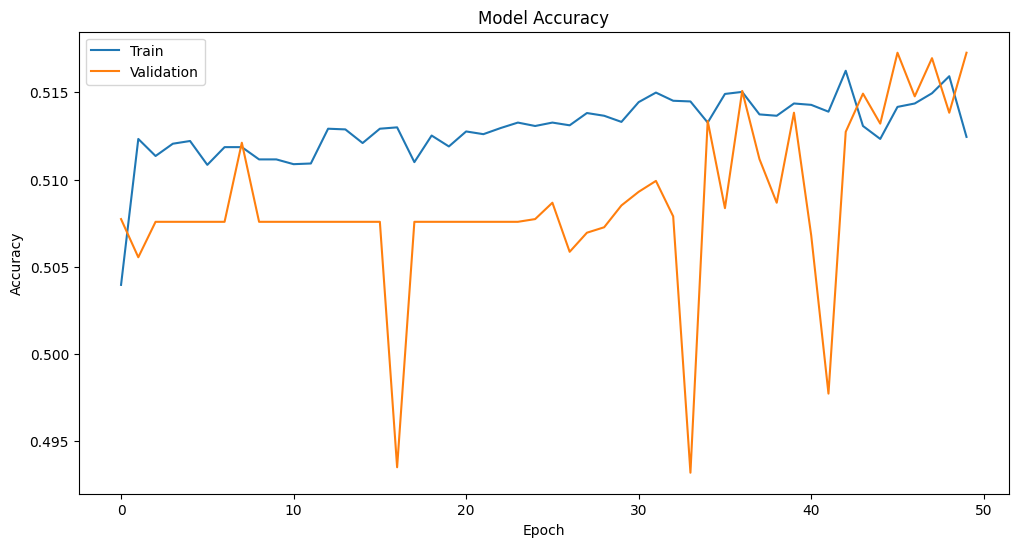

In [145]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##RF

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the classifier
print("Random Forest Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier Evaluation:
Accuracy: 0.49237309327331835

Confusion Matrix:
 [[2240 1801]
 [2259 1698]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.55      0.52      4041
           1       0.49      0.43      0.46      3957

    accuracy                           0.49      7998
   macro avg       0.49      0.49      0.49      7998
weighted avg       0.49      0.49      0.49      7998



In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = lr_classifier.predict(X_test_scaled)

# Evaluate the classifier
print("Logistic Regression Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier Evaluation:
Accuracy: 0.5173793448362091

Confusion Matrix:
 [[3156  885]
 [2975  982]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.78      0.62      4041
           1       0.53      0.25      0.34      3957

    accuracy                           0.52      7998
   macro avg       0.52      0.51      0.48      7998
weighted avg       0.52      0.52      0.48      7998

